## 인공신경망 기초

### AND, OR, XOR 연산

#### 데이터 세트 생성

In [1]:
import tensorflow as tf

x1 = [0,0,1,1]
x2 = [0,1,0,1]
x = tf.transpose(tf.constant([x1,x2],dtype=tf.float32))

and_y = tf.constant([0,0,0,1],dtype=tf.float32)
or_y = tf.constant([0,1,1,1],dtype=tf.float32)
xor_y = tf.constant([0,1,1,0],dtype=tf.float32)

print(f"x: \n{x}")
print(f"AND y:\t{and_y}",f"OR  y:\t{or_y}",f"XOR y:\t{xor_y}",sep="\n")

x: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
AND y:	[0. 0. 0. 1.]
OR  y:	[0. 1. 1. 1.]
XOR y:	[0. 1. 1. 0.]


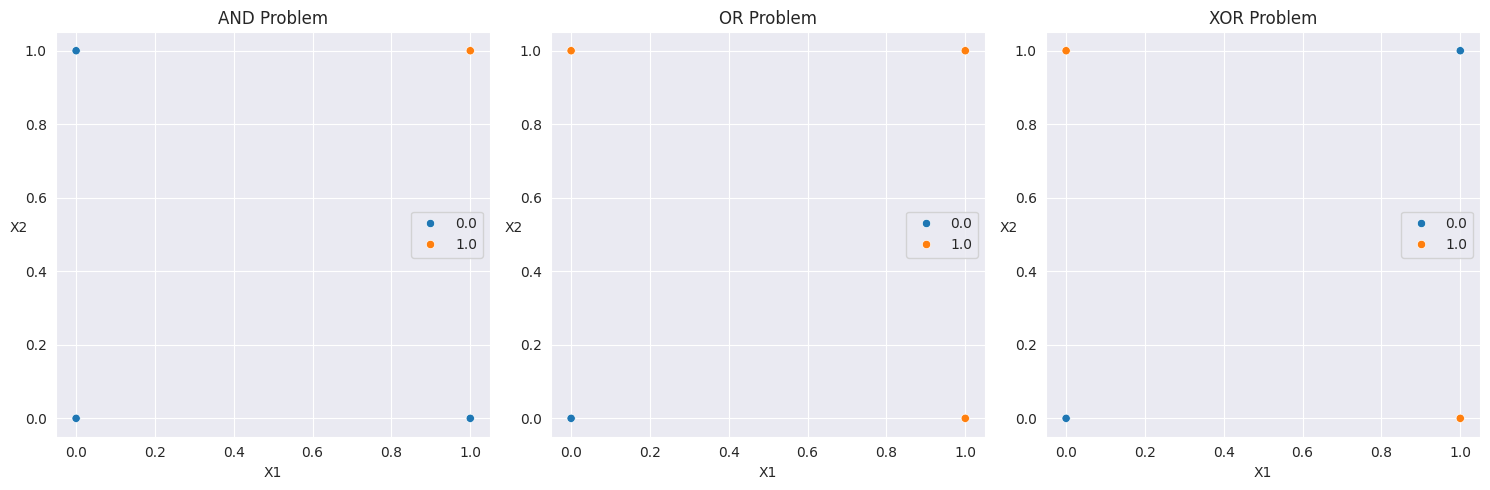

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# AND 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=and_y, ax=axs[0])
axs[0].set_title("AND Problem")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2", rotation=0)

# OR 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=or_y, ax=axs[1])
axs[1].set_title("OR Problem")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2", rotation=0)

# XOR 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=xor_y, ax=axs[2])
axs[2].set_title("XOR Problem")
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2", rotation=0)
plt.tight_layout()
plt.show()

#### 퍼셉트론

In [3]:
# MLP 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

# AND 연산
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss='binary_crossentropy',
              metrics=['accuracy'],)

model.fit(x, and_y, epochs=100, batch_size=4)

# 모델 평가
loss, accuracy = model.evaluate(x, and_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# 예측
predictions = model.predict(x)
print(f'Predictions:\n{predictions}')

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8923 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8412 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7969 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7581 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7233 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6630 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6365 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6120 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5892 - accuracy: 0.7500
Epoch 11/100
1/1 [==========

In [4]:
# OR 연산
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, or_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, or_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 0.5525 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4666 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4241 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3984 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3802 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3658 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3537 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3429 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3330 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3239 - accuracy: 0.7500
Epoch 11/100
1/1 [====

In [5]:
# XOR 연산
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, xor_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, xor_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 0.7325 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7226 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7171 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7135 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7109 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7069 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7053 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7026 - accuracy: 0.5000
Epoch 11/100
1/1 [=====

##### 다층 퍼셉트론

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, xor_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, xor_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8015 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.7149 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6717 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6531 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6379 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6235 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6143 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5907 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5827 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5612 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

### 인공지능 모델의 설계 및 학습

In [7]:
# 임의의 독립 변수 X 값 생성
import tensorflow as tf

x = tf.random.uniform(shape=[100], minval=1, maxval=4)
print(x)

tf.Tensor(
[2.372521  2.6322994 3.5555437 3.9232826 1.3707356 3.2020717 1.9272035
 2.8056293 3.2508655 2.6148477 2.3290071 3.668225  3.1298292 3.8164668
 2.5732732 1.9903063 3.948494  1.7409134 3.1575136 1.9657272 1.4172512
 3.2862384 3.2121048 3.7830467 2.4342108 2.62668   3.9571376 1.2173076
 3.8072436 3.4257283 1.3268676 2.7113702 1.7729855 3.1896744 2.18397
 1.9888589 3.0486076 2.1338902 2.2731686 1.6583604 3.5760632 1.5079092
 3.5507183 2.1051297 3.5416949 3.329457  1.0422312 2.3018322 2.8777642
 2.2870836 2.3466642 2.4596138 2.357987  1.7266104 1.4940779 3.3947356
 3.5460482 1.009387  1.1126056 1.1180876 1.7986578 1.9186337 2.9219928
 3.750319  2.393104  2.5253365 2.1016612 2.0046072 2.125781  2.598857
 1.8006408 3.2889335 2.124824  2.6093376 2.0126855 1.1398368 3.505396
 3.8285067 2.5936513 3.8872151 1.1213095 2.0959463 3.1795537 1.8172855
 1.0798483 1.0496613 3.5192986 2.4219463 2.2622726 3.745321  1.174977
 3.8406534 2.90824   3.6569834 2.2526617 1.9518126 2.2392645 2.2504907


In [8]:
# 선형 관계가 있는 종속 변수 Y 값 생성
slope = 1.5
intercept = 3
epsilon = tf.random.truncated_normal(shape=[100], mean=0, stddev=0.3)
y = slope * x + intercept + epsilon
print(y)

tf.Tensor(
[6.74476   7.2772617 8.622717  9.045624  5.0619035 7.6717353 5.905293
 7.0692835 7.927641  6.5626116 6.4334044 8.029643  7.4742274 8.898156
 7.0743103 6.148149  9.239174  5.9125695 7.587607  5.934496  4.8628244
 7.984823  8.3615265 8.64366   7.160224  6.6854777 8.785186  4.4508643
 8.762458  8.274699  4.8311896 6.848083  5.399192  7.578957  6.071601
 5.643588  7.671221  6.5394545 6.4848323 5.6152444 8.507325  5.1186233
 8.29854   6.0420475 7.969048  7.742587  4.909246  6.497458  6.8644843
 6.462703  5.9278064 6.915589  6.242725  5.6307044 5.248262  7.9113955
 8.506257  4.5883865 4.7234592 4.823672  5.3222647 5.7683983 7.2177887
 8.953697  6.5016966 6.7666006 5.982512  6.125962  6.084887  6.548373
 5.911957  7.6004496 6.289863  6.5255055 5.8243136 4.3064213 8.34051
 8.774697  6.564211  8.910694  5.0841856 6.5299664 7.724908  5.950401
 4.4344554 4.18227   8.255539  7.224036  6.1940446 8.848373  4.67861
 8.803744  7.1300993 8.702858  6.7209067 5.7525964 6.617983  6.2661033
 6.7

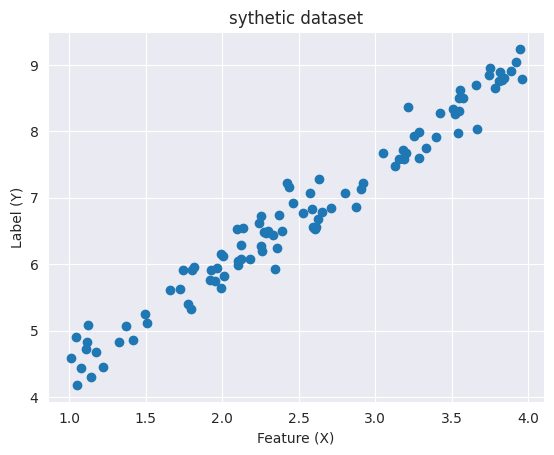

In [9]:
# 맷플로립을 사용한 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.scatter(x, y)
plt.xlabel('Feature (X)')
plt.ylabel('Label (Y)')
plt.title('sythetic dataset')
plt.show()

#### 텐서플로로 선형 데이터 모델링
##### 모델 설계

In [10]:
from tensorflow.keras import Sequential

In [11]:
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

In [13]:
model.add(Dense(1, input_shape=(1,)))

In [14]:
model.compile(loss='mean_squared_error', optimizer='sgd')

##### 모델 학습

In [15]:
x_train = tf.reshape(x, (-1, 1))
x_train.shape

TensorShape([100, 1])

In [16]:
history = model.fit(x_train, y, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 40.4873
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 10.9472
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 2.9398
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0637
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5991
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4857
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4495
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4368
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4346
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4215
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4153
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4106
Epoch 13/300
4/4 [==============================] - 0s 3ms/

In [17]:
weights, bias = model.get_weights()
print("Weights (Slope):", weights)
print("Bias (Intercept):", bias)

Weights (Slope): [[1.6040664]]
Bias (Intercept): [2.6821833]


## 생성적 적대 신경망 아이디어
### 텐서플로를 활용한 생성적 적대 신경망의 학습 실습

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from google.colab.patches import cv2_imshow

(train_images, _), (_, _) = mnist.load_data()
train_images = (train_images - 127.5) / 127.5

11490434/11490434 [==============================] - 0s 0us/step


In [19]:
cv2_imshow(train_images[0]*127.5+127.5)

#### 모델 생성

In [20]:
def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(28*28, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model

In [21]:
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [22]:
INPUT_DIM = 50
BATCH_SIZE = 64
EPOCHS = 10
BUFFER_SIZE = 600

In [23]:
generator = build_generator(INPUT_DIM)
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-2)

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images)\
                  .shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#### 손실 함수

In [28]:
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output): # ①
    real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return binary_cross_entropy(tf.ones_like(fake_output), fake_output)

In [29]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, INPUT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss, generated_images

#### 모델 학습

In [30]:
for epoch in range(1,EPOCHS+1):
    t = tqdm(train_dataset)
    for image_batch in t:
        g_loss, d_loss, fake_image = train_step(image_batch)
        t.set_description_str(f"Epoch - {epoch}")
        t.set_postfix({"G_loss":"%0.3f" %g_loss.numpy(),
                       "D_loss":"%0.3f" %d_loss.numpy()})
    cv2_imshow(np.concatenate(
        list(fake_image.numpy()[:10]*127.5+127.5),axis=1))

Epoch - 1: 100%|██████████| 938/938 [00:20<00:00, 45.80it/s, G_loss=17.343, D_loss=0.889] 


Epoch - 2: 100%|██████████| 938/938 [00:10<00:00, 89.02it/s, G_loss=53.396, D_loss=2.066]


Epoch - 3: 100%|██████████| 938/938 [00:09<00:00, 101.61it/s, G_loss=1.970, D_loss=0.973]


Epoch - 4: 100%|██████████| 938/938 [00:07<00:00, 129.96it/s, G_loss=3.813, D_loss=0.265]


Epoch - 5: 100%|██████████| 938/938 [00:10<00:00, 91.71it/s, G_loss=7.213, D_loss=1.365] 


Epoch - 6: 100%|██████████| 938/938 [00:07<00:00, 128.49it/s, G_loss=3.593, D_loss=0.231]


Epoch - 7: 100%|██████████| 938/938 [00:07<00:00, 124.47it/s, G_loss=2.425, D_loss=0.758]


Epoch - 8: 100%|██████████| 938/938 [00:07<00:00, 129.40it/s, G_loss=7.810, D_loss=1.907]


Epoch - 9: 100%|██████████| 938/938 [00:07<00:00, 133.89it/s, G_loss=3.351, D_loss=0.971]


Epoch - 10: 100%|██████████| 938/938 [00:10<00:00, 91.73it/s, G_loss=1.391, D_loss=1.685] 


#### 전체 코드





Epoch - 1: 100%|██████████| 938/938 [00:10<00:00, 89.62it/s, G_loss=3.839, D_loss=0.333] 


Epoch - 2: 100%|██████████| 938/938 [00:07<00:00, 132.26it/s, G_loss=14.711, D_loss=0.579]


Epoch - 3: 100%|██████████| 938/938 [00:07<00:00, 130.30it/s, G_loss=10.439, D_loss=3.339]


Epoch - 4: 100%|██████████| 938/938 [00:08<00:00, 114.41it/s, G_loss=8.143, D_loss=0.843]


Epoch - 5: 100%|██████████| 938/938 [00:06<00:00, 134.27it/s, G_loss=5.729, D_loss=0.606]


Epoch - 6: 100%|██████████| 938/938 [00:06<00:00, 148.36it/s, G_loss=8.375, D_loss=2.472]


Epoch - 7: 100%|██████████| 938/938 [00:07<00:00, 121.99it/s, G_loss=3.206, D_loss=0.251]


Epoch - 8: 100%|██████████| 938/938 [00:06<00:00, 150.48it/s, G_loss=3.418, D_loss=1.226]


Epoch - 9: 100%|██████████| 938/938 [00:10<00:00, 91.70it/s, G_loss=4.184, D_loss=0.477] 


Epoch - 10: 100%|██████████| 938/938 [00:07<00:00, 128.97it/s, G_loss=2.489, D_loss=0.556]


1/1 [==============================] - 0s 205ms/step


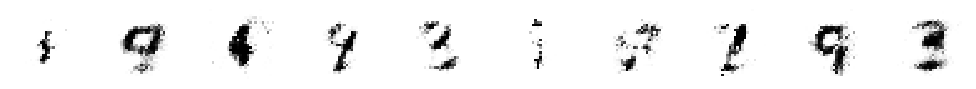

In [31]:
# 앞의 코드를 합친 전체 코드
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from google.colab.patches import cv2_imshow

(train_images, _), (_, _) = mnist.load_data()
train_images = (train_images - 127.5) / 127.5  # 이미지 정규화


train_images[0]


# 생성자 모델 생성
def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(28*28, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model

# 판별자 모델 생성
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 하이퍼파라미터 설정
INPUT_DIM = 50
BATCH_SIZE = 64
EPOCHS = 10
BUFFER_SIZE = 600

# 모델 생성
generator = build_generator(INPUT_DIM)
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-2)


# 데이터 로더 생성
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# 손실함수 정의
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return binary_cross_entropy(tf.ones_like(fake_output), fake_output)


@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, INPUT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss, generated_images


# 훈련
for epoch in range(1,EPOCHS+1):
    t = tqdm(train_dataset)
    for image_batch in t:
        g_loss, d_loss, fake_image = train_step(image_batch)
        t.set_description_str(f"Epoch - {epoch}")
        t.set_postfix({"G_loss":"%0.3f" %g_loss.numpy(), "D_loss":"%0.3f" %d_loss.numpy()})
    cv2_imshow(np.concatenate(list(fake_image.numpy()[:10]*127.5+127.5),axis=1))


# 생성된 이미지 시각화
import matplotlib.pyplot as plt

examples = 10
dim=(1, examples)
figsize=(10, 1)
noise = np.random.normal(0, 1, (examples, INPUT_DIM))
generated_images = generator.predict(noise)
plt.figure(figsize=figsize)
for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [32]:
# 이미지 생성 예시
cv2_imshow(np.concatenate(list(image_batch.numpy()[:10]*127+127),axis=1))

## 딥러닝을 활용한 이미지 처리
### 이미지 분류
#### 이미지 분류를 위한 데이터 전처리


In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [34]:
# CIFAR-10 데이터 세트를 불러옵니다.

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [35]:
# 데이터를 확인합니다.

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
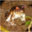

In [37]:
# 정규화된 이미지 데이터를 하나 확인합니다.

train_images[0]

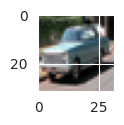

In [38]:
# 확인을 위해 출력
plt.figure(figsize=(1, 1))
plt.imshow(train_images[32])

In [39]:
# 정규화를 위해 255로 나누어 줍니다.

train_images = train_images / 255.0
test_images = test_images / 255.0

In [40]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [41]:
# 훈련 데이터셋과 검증 데이터셋으로 나누어 줍니다.

val_images = train_images[45000:]
val_labels = train_labels[45000:]

train_images = train_images[:45000]
train_labels = train_labels[:45000]

In [42]:
# 모델을 생성합니다.

mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [43]:
# 모델의 구조를 확인합니다.

mlp_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               1573376   
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# 모델을 컴파일합니다.

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [45]:
# 모델을 훈련합니다.

mlp_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
1403/1407 [============================>.] - ETA: 0s - loss: 1.8775 - accuracy: 0.3172

1407/1407 [==============================] - 7s 4ms/step - loss: 1.8773 - accuracy: 0.3173 - val_loss: 1.7234 - val_accuracy: 0.3822
Epoch 2/5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6989 - accuracy: 0.3896 - val_loss: 1.6493 - val_accuracy: 0.4108
Epoch 3/5
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6135 - accuracy: 0.4183 - val_loss: 1.6456 - val_accuracy: 0.4074
Epoch 4/5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5549 - accuracy: 0.4421 - val_loss: 1.5453 - val_accuracy: 0.4460
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5132 - accuracy: 0.4587 - val_loss: 1.5482 - val_accuracy: 0.4478


In [46]:
# 모델을 평가합니다.

mlp_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5308 - accuracy: 0.4506


[1.5308476686477661, 0.4505999982357025]

#### 합성곱 신경망을 활용한 이미지 분류

In [47]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [48]:
# 모델을 만듭니다.

cnn_model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])

In [49]:
# 모델의 구조를 확인합니다.

cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 4096)            

In [50]:
# 모델을 컴파일합니다.

cnn_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [51]:
# EarlyStopping, ModelCheckpoint 콜백을 정의합니다.

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
save_best_only = ModelCheckpoint('best_cifar10_cnn_model.h5', save_best_only=True)

In [52]:
# 모델을 학습시킵니다.
# 중간에 학습이 중단되는 게 맞습니다.

history = cnn_model.fit(train_images, train_labels, batch_size=512, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping, save_best_only])

Epoch 1/100
88/88 [==============================] - 8s 30ms/step - loss: 1.9466 - accuracy: 0.2882 - val_loss: 1.5729 - val_accuracy: 0.4550
Epoch 2/100
 9/88 [==>...........................] - ETA: 1s - loss: 1.7048 - accuracy: 0.3770

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 1s 17ms/step - loss: 1.6169 - accuracy: 0.4160 - val_loss: 1.3720 - val_accuracy: 0.5104
Epoch 3/100
88/88 [==============================] - 2s 18ms/step - loss: 1.4841 - accuracy: 0.4693 - val_loss: 1.2966 - val_accuracy: 0.5574
Epoch 4/100
88/88 [==============================] - 2s 20ms/step - loss: 1.3859 - accuracy: 0.5045 - val_loss: 1.1925 - val_accuracy: 0.5832
Epoch 5/100
88/88 [==============================] - 2s 18ms/step - loss: 1.3137 - accuracy: 0.5343 - val_loss: 1.1278 - val_accuracy: 0.6120
Epoch 6/100
88/88 [==============================] - 1s 17ms/step - loss: 1.2580 - accuracy: 0.5536 - val_loss: 1.0696 - val_accuracy: 0.6326
Epoch 7/100
88/88 [==============================] - 1s 17ms/step - loss: 1.1963 - accuracy: 0.5772 - val_loss: 1.0415 - val_accuracy: 0.6370
Epoch 8/100
88/88 [==============================] - 2s 18ms/step - loss: 1.1504 - accuracy: 0.5949 - val_loss: 1.0214 - val_accuracy: 0.6470
Epoch 9/100
88/88 

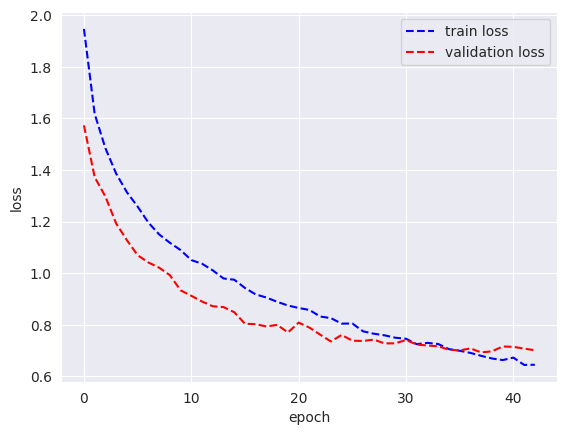

In [53]:
# 각 스텝의 학습 손실과 검증 손실을 그래프로 나타냅니다.

plt.plot(history.history['loss'], 'b--')
plt.plot(history.history['val_loss'], 'r--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [54]:
# 모델을 평가합니다.

cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7295 - accuracy: 0.7549


[0.7294793725013733, 0.7548999786376953]

In [55]:
# 예측 레이블 배열을 생성합니다.

predicted_labels = cnn_model.predict(test_images)
predicted_labels.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [56]:
# 각 배열의 최대 값의 색인을 뽑아내어 예측 레이블로 사용합니다.

import tensorflow as tf

predicted_labels = tf.argmax(predicted_labels, axis=1)
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 1, 7])>

In [57]:
label_to_name = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

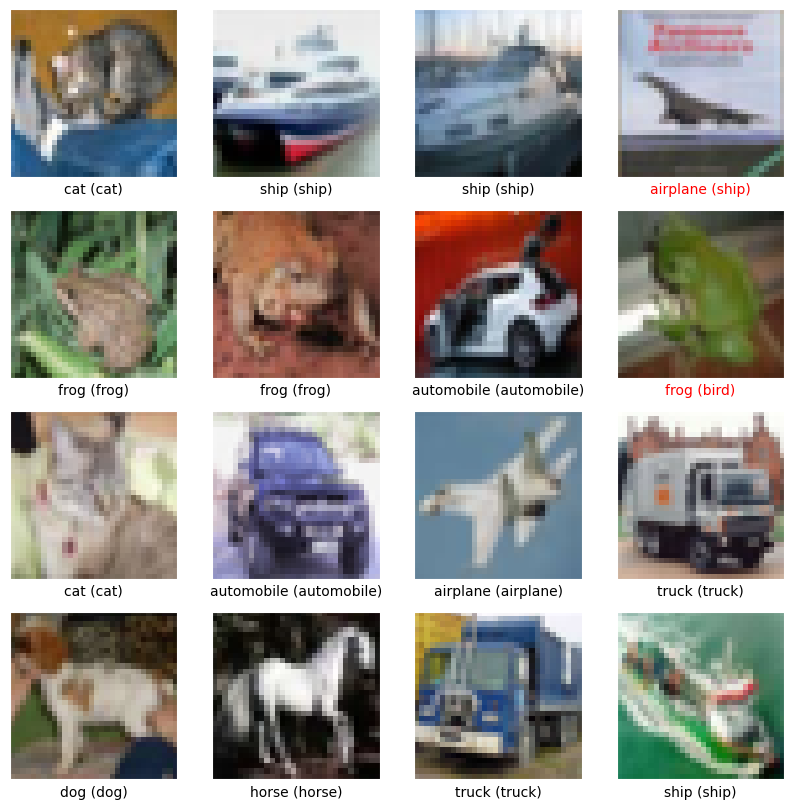

In [58]:
# test_images를 시각화하여 test_labels와 predicted_labels를 비교합니다.
# test_labels와 predicted_labels가 다를 때, xlabel의 색깔을 빨강색으로 변경합니다.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    xlabel = f"{label_to_name[int(test_labels[i][0])]} ({label_to_name[int(predicted_labels[i])]})"
    plt.xlabel(xlabel, color='red' if test_labels[i][0] != predicted_labels[i] else 'black')

## 객체 인식

In [59]:
import cv2
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg

# 이미지 로드
image_path = "/content/three young man.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 하르 캐스케이드 로드
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 얼굴 탐지
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print(faces)

--2024-02-26 06:49:36--  https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146736 (143K) [image/jpeg]
Saving to: ‘three young man.jpg’

three young man.jpg 100%[===================>] 143.30K  --.-KB/s    in 0.02s   

2024-02-26 06:49:36 (9.28 MB/s) - ‘three young man.jpg’ saved [146736/146736]

[[449 111 173 173]
 [721 106 170 170]
 [159 148 160 160]
 [371 376 116 116]]


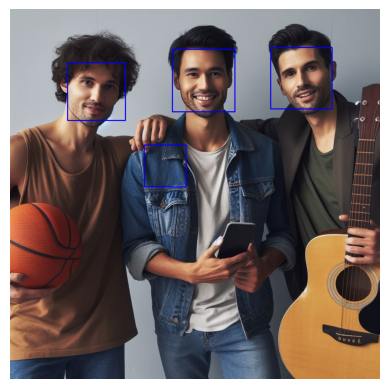

In [60]:
# 탐지된 얼굴에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 결과 표시
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 숨기기
plt.show()